In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
pd.set_option('display.width', 2000)

In [2]:

nucleus_df = pd.read_csv('csv/nuclei.csv')

In [3]:


# Filter the dataframe to include only neurons with 'CellType' neunPositive or neunPositiveLow
neun_positive_df = nucleus_df[((nucleus_df['CellType'] == 'neunPositive') | (nucleus_df['CellType'] == 'neunPositiveLow')) & (nucleus_df['Location'] != 'Undefined')]

# Group the filtered data by 'Location', 'Condition', and 'ImageName' to count the number of neurons in each region for each image and condition
neuron_counts = neun_positive_df.groupby(['Location', 'Condition', 'ImageName']).size().reset_index(name='NeuronCount')
print(neuron_counts)



   Location Condition                                          ImageName  NeuronCount
0       CA1    Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          635
1       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563
2       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          726
3       CA1    Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          674
4       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          476
5       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          372
6       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          537
7       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          516
8       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          449
9       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          435
10      CA1      Sham  Sham 1 Contralateral Mouse 6 Sl

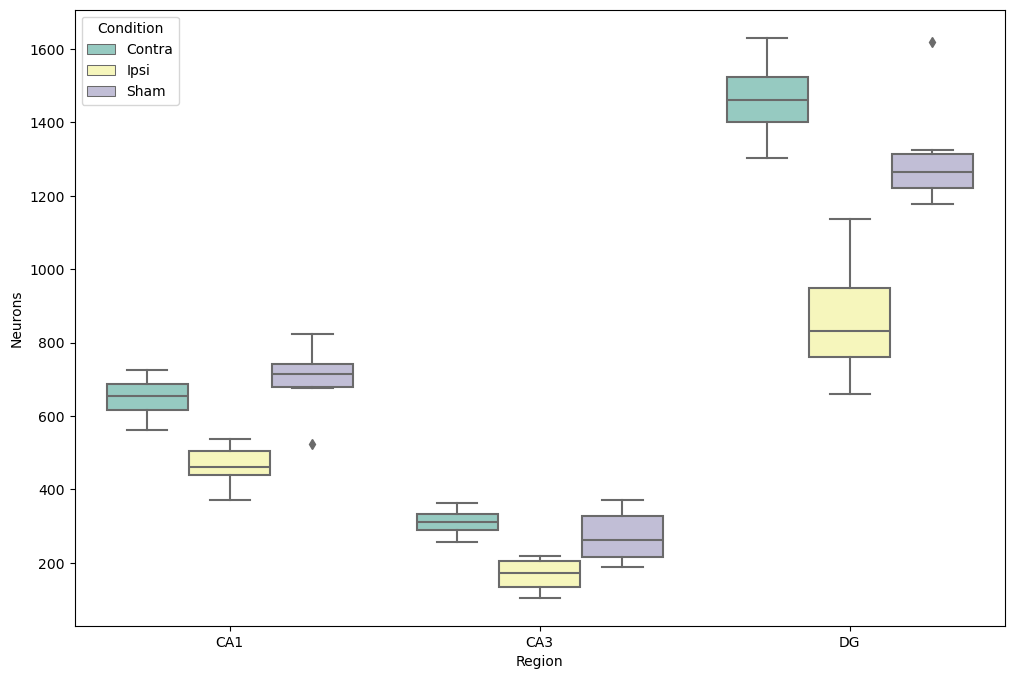

In [4]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='NeuronCount', hue='Condition', data=neuron_counts, palette='Set3')
plt.xlabel('Region')
plt.ylabel('Neurons')
plt.legend(title='Condition')
plt.show()

In [5]:
print(neuron_counts)

   Location Condition                                          ImageName  NeuronCount
0       CA1    Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          635
1       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563
2       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          726
3       CA1    Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          674
4       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          476
5       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          372
6       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          537
7       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          516
8       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          449
9       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          435
10      CA1      Sham  Sham 1 Contralateral Mouse 6 Sl

   Location Condition_x                                          ImageName  NeuronCount Condition_y     CA1Volume     CA3Volume      DGVolume  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity  NeuronDensity
0       CA1      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          635      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181     615.303544
1       CA3      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          364      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181     358.297897
2        DG      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...         1631      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181    1365.650472
3       CA1      Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563      Contra  9.995970e+05  7.699031e+05  1.170954e+06      7

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_5248\4208041455.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0006153  0.00056323 0.0005815  0.00055142 0.00048627 0.00038581
 0.0005878  0.00054817 0.0005279  0.00042274 0.00038029 0.00056347
 0.00052092 0.00059699 0.00051113 0.00044045]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_df.loc[merged_df['Location'] == 'CA1', 'NeuronDensity'] /= merged_df['CA1Volume']  # Divide by CA1Volume where Location is CA1
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: F

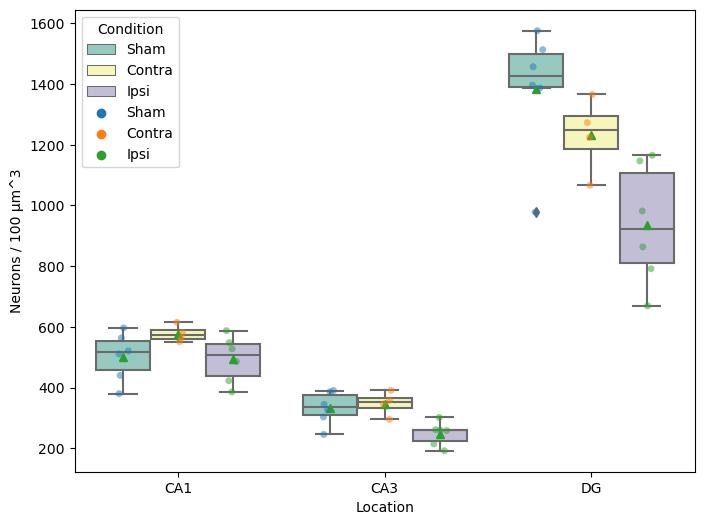

In [6]:
images_df = pd.read_csv("csv/images.csv")

merged_df = pd.merge(neuron_counts, images_df, on='ImageName')

merged_df['NeuronDensity'] = merged_df['NeuronCount']  # Initialize the column with Nuclei counts
merged_df.loc[merged_df['Location'] == 'CA1', 'NeuronDensity'] /= merged_df['CA1Volume']  # Divide by CA1Volume where Location is CA1
merged_df.loc[merged_df['Location'] == 'CA3', 'NeuronDensity'] /= merged_df['CA3Volume']  # Divide by CA3Volume where Location is CA3
merged_df.loc[merged_df['Location'] == 'DG', 'NeuronDensity'] /= merged_df['DGVolume']    # Divide by DGVolume where Location is DG
merged_df['NeuronDensity'] *= 10**6

condition_order = ['Sham', 'Contra', 'Ipsi']
print(merged_df)

# Create the figure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Location', y='NeuronDensity', hue='Condition_x', palette='Set3', hue_order=condition_order, data=merged_df)
sns.stripplot(x='Location', y='NeuronDensity', hue='Condition_x', hue_order=condition_order, dodge=True, data=merged_df, alpha=0.5)
plt.xlabel('Location')
plt.ylabel('Neurons / 100 \u03bcm^3')
plt.legend(title='Condition')
plt.savefig("plots/total_neurons_region_volume.pdf")
plt.show()